<a href="https://colab.research.google.com/github/sokrypton/7.571/blob/main/L2/bootstrap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from matplotlib import pylab as plt
from scipy.stats import ttest_ind
from scipy.stats import sem
import math

def hist_plot(control_dist, ko_dist, bins=100):
    plt.hist(control_dist, bins=bins, alpha=0.5, label='control')
    plt.hist(ko_dist, bins=bins, alpha=0.5, label='ko')
    plt.xlabel('protein X levels')
    plt.ylabel('# cells with that protein level')
    plt.legend()
    plt.show()

## Resampling methods | The bootstrap
* Often, we'd like to calculate the significance of some statistic, but we may not know the underlying distribution of the population we sampled from
    * Or, more often, we can't find the analytical solution to calculate that number.
    * For example, let's say we want to calculate the standard error of the **median**

* **Bootstrapping** to the rescue.
* Here we're going to computationally sample (WITH REPLACEMENT) from our expeirmental data and look at the distribution of some statistic of interest.

# Biological setup
* Imagine that we have a population of cells that stoichastically expresses your protein of interest at high copy, or at low copy. These cells are present a very low copy in the mouse brain, but we can idenify them by staining for a series of markers, and we can typically only see a single cell per brain that we study.
* Once we find one of these cells, we can measure if the protein of interest is high or low copy by IF.

In [ ]:
sample_size = 30 # This is our "N" - the number of cells we were able to measure


In [ ]:
fraction_high_copy = 0.5 # This is the real parameter for the population - 50% of this specialized cell type expresses this protein at high copy.
facs_results = []
for i in range(sample_size):
    if np.random.rand() < fraction_high_copy: #this simulates look at the cell and deciding if it is lowly (1.0) or highly (2.0) expressed
        facs_results.append(1.0)
    else:
        facs_results.append(2.0)
facs_results = np.array(facs_results)

In [ ]:
facs_results

array([1., 1., 2., 2., 2., 2., 2., 1., 2., 1., 2., 2., 2., 2., 1., 2., 1.,
       1., 2., 2., 1., 2., 2., 2., 1., 1., 2., 2., 2., 1.])

* What is the mean number of high-copy cells?
* What is the standard deviation in the number of high-copy cells?
* What is the standard error of the mean?
* What is the median number of high-copy cells?


In [ ]:
print('sample mean is: ' + str(np.mean(facs_results)))
print('sample standard deviation is ' + str(np.std(facs_results)))
print('sample standard error of the mean (our precision) is ' + str(sem(facs_results)))
print('sample median is  ' + str(np.median(facs_results)))

sample mean is: 1.6333333333333333
sample standard deviation is 0.48189440982669857
sample standard error of the mean (our precision) is 0.08948554539839962
sample median is  2.0


* What is the standard error of the median?

### Key idea - resampling methods.
* The idea behind standard error of the mean (or median) is to get an estimate of how 'good' our estimate of the mean (or median) actually is.
* With certain assumptions (and math), one can derive a closed-form solution to calculating the standard error of the mean.
* Alternatively, we can just simulate sampling our data repeatedly to get an idea of the dispersion in the mean we might observe.
* Resampling is extermely powerful as we can calculate various statistics, perform statistical tests, etc. by just simulating our data and calculating a result

In [ ]:
def bootstrap(input_data, number_iterations): #this function will perform the bootstrap estimation for us given some input_data (our initial sample)
    all_bootstrapped_data = [] #this is a list of all of our data
    data_points = input_data.shape[0]
    for i in range(number_iterations): #we will iterate as many times we we are willing to compute - only limited by computational power, and this will only help 'smooth our curves'
        all_bootstrapped_data.append(np.random.choice(input_data, data_points, replace=True))
    return all_bootstrapped_data

In [ ]:
all_bootstrapped_data = bootstrap(facs_results, 10000) #use our results of 30 samples from above, and bootstrap 10,000 times

In [ ]:
all_bootstrapped_data

[array([2., 2., 2., 1., 1., 2., 2., 2., 2., 1., 2., 1., 2., 1., 2., 2., 2.,
        2., 1., 2., 2., 1., 2., 2., 2., 1., 2., 2., 2., 2.]),
 array([1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 1., 1., 1., 2., 1., 2., 2.,
        2., 2., 1., 1., 2., 1., 2., 2., 2., 2., 2., 2., 2.]),
 array([1., 2., 2., 1., 2., 2., 1., 1., 2., 2., 1., 1., 1., 1., 1., 2., 2.,
        2., 2., 1., 1., 2., 2., 1., 2., 1., 2., 1., 2., 1.]),
 array([1., 2., 1., 1., 2., 1., 2., 2., 1., 1., 2., 2., 1., 2., 2., 2., 2.,
        2., 2., 1., 2., 2., 1., 1., 2., 2., 2., 2., 2., 1.]),
 array([1., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 1., 1., 2., 2., 1., 2.,
        1., 2., 2., 2., 2., 1., 1., 1., 1., 2., 2., 1., 1.]),
 array([2., 2., 2., 2., 1., 1., 2., 2., 2., 2., 1., 2., 1., 2., 2., 2., 1.,
        1., 2., 2., 2., 2., 1., 2., 2., 2., 1., 2., 2., 1.]),
 array([1., 1., 1., 2., 1., 2., 2., 2., 2., 2., 1., 2., 2., 2., 1., 1., 2.,
        1., 2., 1., 1., 2., 2., 2., 1., 1., 1., 2., 2., 2.]),
 array([2., 2., 2., 1., 2., 1., 2.

In [ ]:
mean_values = [round(np.mean(resampled_data),2) for resampled_data in all_bootstrapped_data]

In [ ]:
mean_values

[1.73,
 1.7,
 1.5,
 1.63,
 1.6,
 1.7,
 1.57,
 1.73,
 1.53,
 1.33,
 1.73,
 1.53,
 1.77,
 1.6,
 1.67,
 1.7,
 1.73,
 1.5,
 1.53,
 1.53,
 1.63,
 1.63,
 1.63,
 1.67,
 1.73,
 1.67,
 1.67,
 1.7,
 1.77,
 1.6,
 1.4,
 1.73,
 1.63,
 1.6,
 1.63,
 1.63,
 1.5,
 1.67,
 1.67,
 1.57,
 1.73,
 1.7,
 1.57,
 1.67,
 1.57,
 1.7,
 1.53,
 1.77,
 1.53,
 1.6,
 1.6,
 1.67,
 1.77,
 1.7,
 1.43,
 1.77,
 1.6,
 1.57,
 1.73,
 1.67,
 1.67,
 1.57,
 1.6,
 1.63,
 1.6,
 1.7,
 1.4,
 1.63,
 1.57,
 1.6,
 1.67,
 1.57,
 1.73,
 1.57,
 1.67,
 1.63,
 1.63,
 1.6,
 1.57,
 1.47,
 1.47,
 1.83,
 1.63,
 1.67,
 1.43,
 1.63,
 1.7,
 1.7,
 1.6,
 1.47,
 1.5,
 1.67,
 1.63,
 1.73,
 1.77,
 1.5,
 1.6,
 1.57,
 1.53,
 1.63,
 1.77,
 1.73,
 1.63,
 1.57,
 1.63,
 1.73,
 1.53,
 1.57,
 1.57,
 1.57,
 1.57,
 1.63,
 1.77,
 1.57,
 1.6,
 1.63,
 1.37,
 1.57,
 1.6,
 1.7,
 1.57,
 1.57,
 1.47,
 1.57,
 1.77,
 1.6,
 1.77,
 1.73,
 1.77,
 1.63,
 1.73,
 1.63,
 1.43,
 1.63,
 1.63,
 1.47,
 1.57,
 1.73,
 1.63,
 1.67,
 1.4,
 1.73,
 1.87,
 1.7,
 1.73,
 1.7,
 1.47,
 1.6,
 1

Text(0, 0.5, '# of bootstraps\nwith that sample mean')

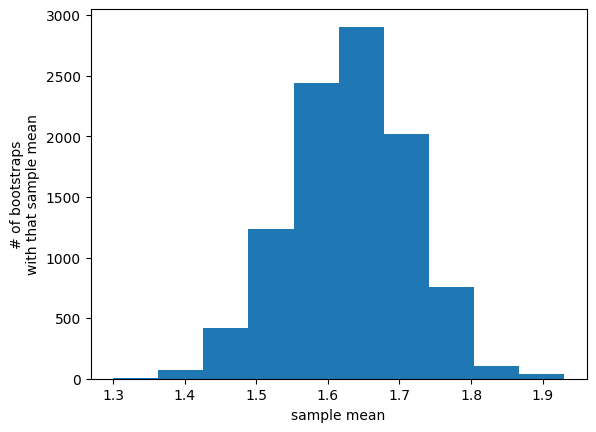

In [ ]:
a = plt.hist(mean_values, bins=10)
plt.xlabel('sample mean')
plt.ylabel('# of bootstraps\nwith that sample mean')

* We now have a distribution of mean values from our 10,000 bootstraps...what's a good measure of the dispersion of this dataset?

In [ ]:
print('standard deviation of the set of bootstrapped mean values: '+ str(round(np.std(mean_values),3)))
print('standard error of the mean: '+ str(round(sem(facs_results),3)))
print('OMG!!!')

standard deviation of the set of bootstrapped mean values: 0.088
standard error of the mean: 0.089
OMG!!!


How about the median?
* Simply the standard deviation of the distribution of the median!

### Key point:
* Using the bootstrap, we can calculate the standard error of **whatever** by simulating a large number of samples, calculating our **whatever** on each of them, and calculating the standard deviation of that resulting distribution.
* Bootstrapping is extremely powerful given that computation is now effectively free...thanks Jeff, MacKenzie, Larry, and Sergey